<a href="https://colab.research.google.com/github/romenmeitei/Network_Pharmacology/blob/main/Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving AMR_Network_Edge_List.csv to AMR_Network_Edge_List (2).csv
Loaded Data:
  Source Target                         Type  \
0   OmpA  BlaR1       Regulatory Interaction   
1   OmpA   AmpC          Indirect Activation   
2   OmpA   AdeB  Protein-Protein Interaction   
3   OmpA   MexR       Regulatory Interaction   
4   OmpA   OmpC       Structural Interaction   

                                         Description  
0  OmpA may influence beta-lactamase gene activation  
1  AmpC overexpression is linked to OmpA-related ...  
2        OmpA interacts with RND efflux pump systems  
3     OmpA affects MexR's regulation of efflux pumps  
4  OmpA cooperates with other porins for permeabi...  

Network Summary:
Number of nodes: 12
Number of edges: 12
Network density: 0.18181818181818182


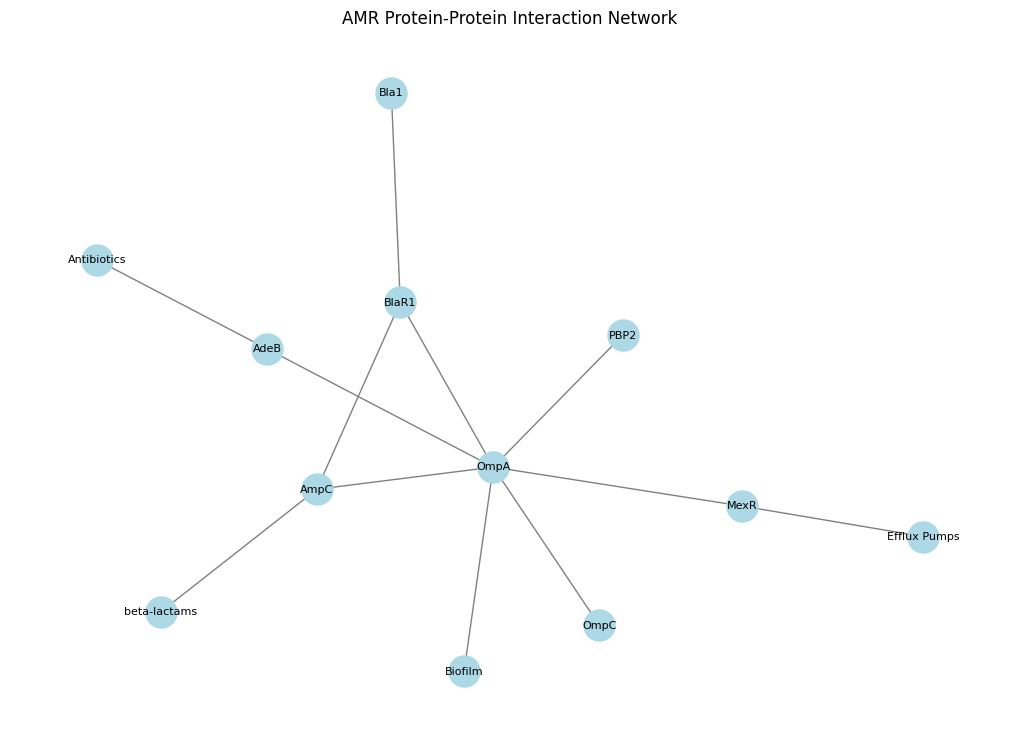

In [ ]:
### Install Required Libraries
!pip install networkx pandas matplotlib py2cytoscape

### Import Libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from py2cytoscape import cyrest

### Step 1: Load the Network Data
# Upload your CSV file manually in Colab before running this cell
from google.colab import files
uploaded = files.upload()

# Load the file into a Pandas dataframe
file_name = list(uploaded.keys())[0]  # Get uploaded file name
df = pd.read_csv(file_name)
print("Loaded Data:")
print(df.head())

### Step 2: Create Network Graph
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Type', create_using=nx.Graph())

# Print Network Info
print("\nNetwork Summary:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G)}")


### Step 3: Compute Network Properties
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
nx.set_node_attributes(G, clustering_coefficient, 'clustering')

### Step 4: Visualize the Network in Matplotlib
plt.figure(figsize=(10,7))
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("AMR Protein-Protein Interaction Network")
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your network graph
degrees = [G.degree(n) for n in G.nodes()]

# Print node degrees
for node, degree in G.degree():
    print(f"Node {node}: Degree {degree}")


Node OmpA: Degree 7
Node BlaR1: Degree 3
Node AmpC: Degree 3
Node AdeB: Degree 2
Node MexR: Degree 2
Node OmpC: Degree 1
Node PBP2: Degree 1
Node Biofilm: Degree 1
Node Bla1: Degree 1
Node Antibiotics: Degree 1
Node beta-lactams: Degree 1
Node Efflux Pumps: Degree 1


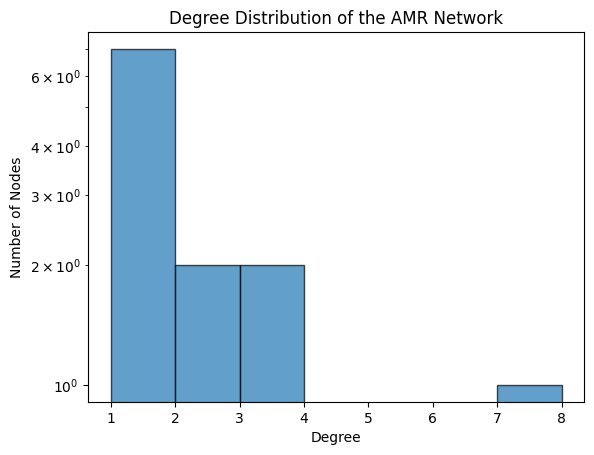

In [ ]:
import matplotlib.pyplot as plt

degrees = [G.degree(n) for n in G.nodes()]

plt.hist(degrees, bins=range(1, max(degrees) + 2), edgecolor="black", alpha=0.7)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution of the AMR Network")
plt.yscale("log")  # Helps in case of skewed distribution
plt.show()


In [ ]:
degree_centrality = nx.degree_centrality(G)
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))


[('OmpA', 0.6363636363636364), ('BlaR1', 0.2727272727272727), ('AmpC', 0.2727272727272727), ('AdeB', 0.18181818181818182), ('MexR', 0.18181818181818182), ('OmpC', 0.09090909090909091), ('PBP2', 0.09090909090909091), ('Biofilm', 0.09090909090909091), ('Bla1', 0.09090909090909091), ('Antibiotics', 0.09090909090909091), ('beta-lactams', 0.09090909090909091), ('Efflux Pumps', 0.09090909090909091)]


In [ ]:
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")


Average Clustering Coefficient: 0.059523809523809514


In [ ]:
betweenness = nx.betweenness_centrality(G)
print(sorted(betweenness.items(), key=lambda x: x[1], reverse=True))


[('OmpA', 0.8545454545454545), ('BlaR1', 0.18181818181818182), ('AmpC', 0.18181818181818182), ('AdeB', 0.18181818181818182), ('MexR', 0.18181818181818182), ('OmpC', 0.0), ('PBP2', 0.0), ('Biofilm', 0.0), ('Bla1', 0.0), ('Antibiotics', 0.0), ('beta-lactams', 0.0), ('Efflux Pumps', 0.0)]


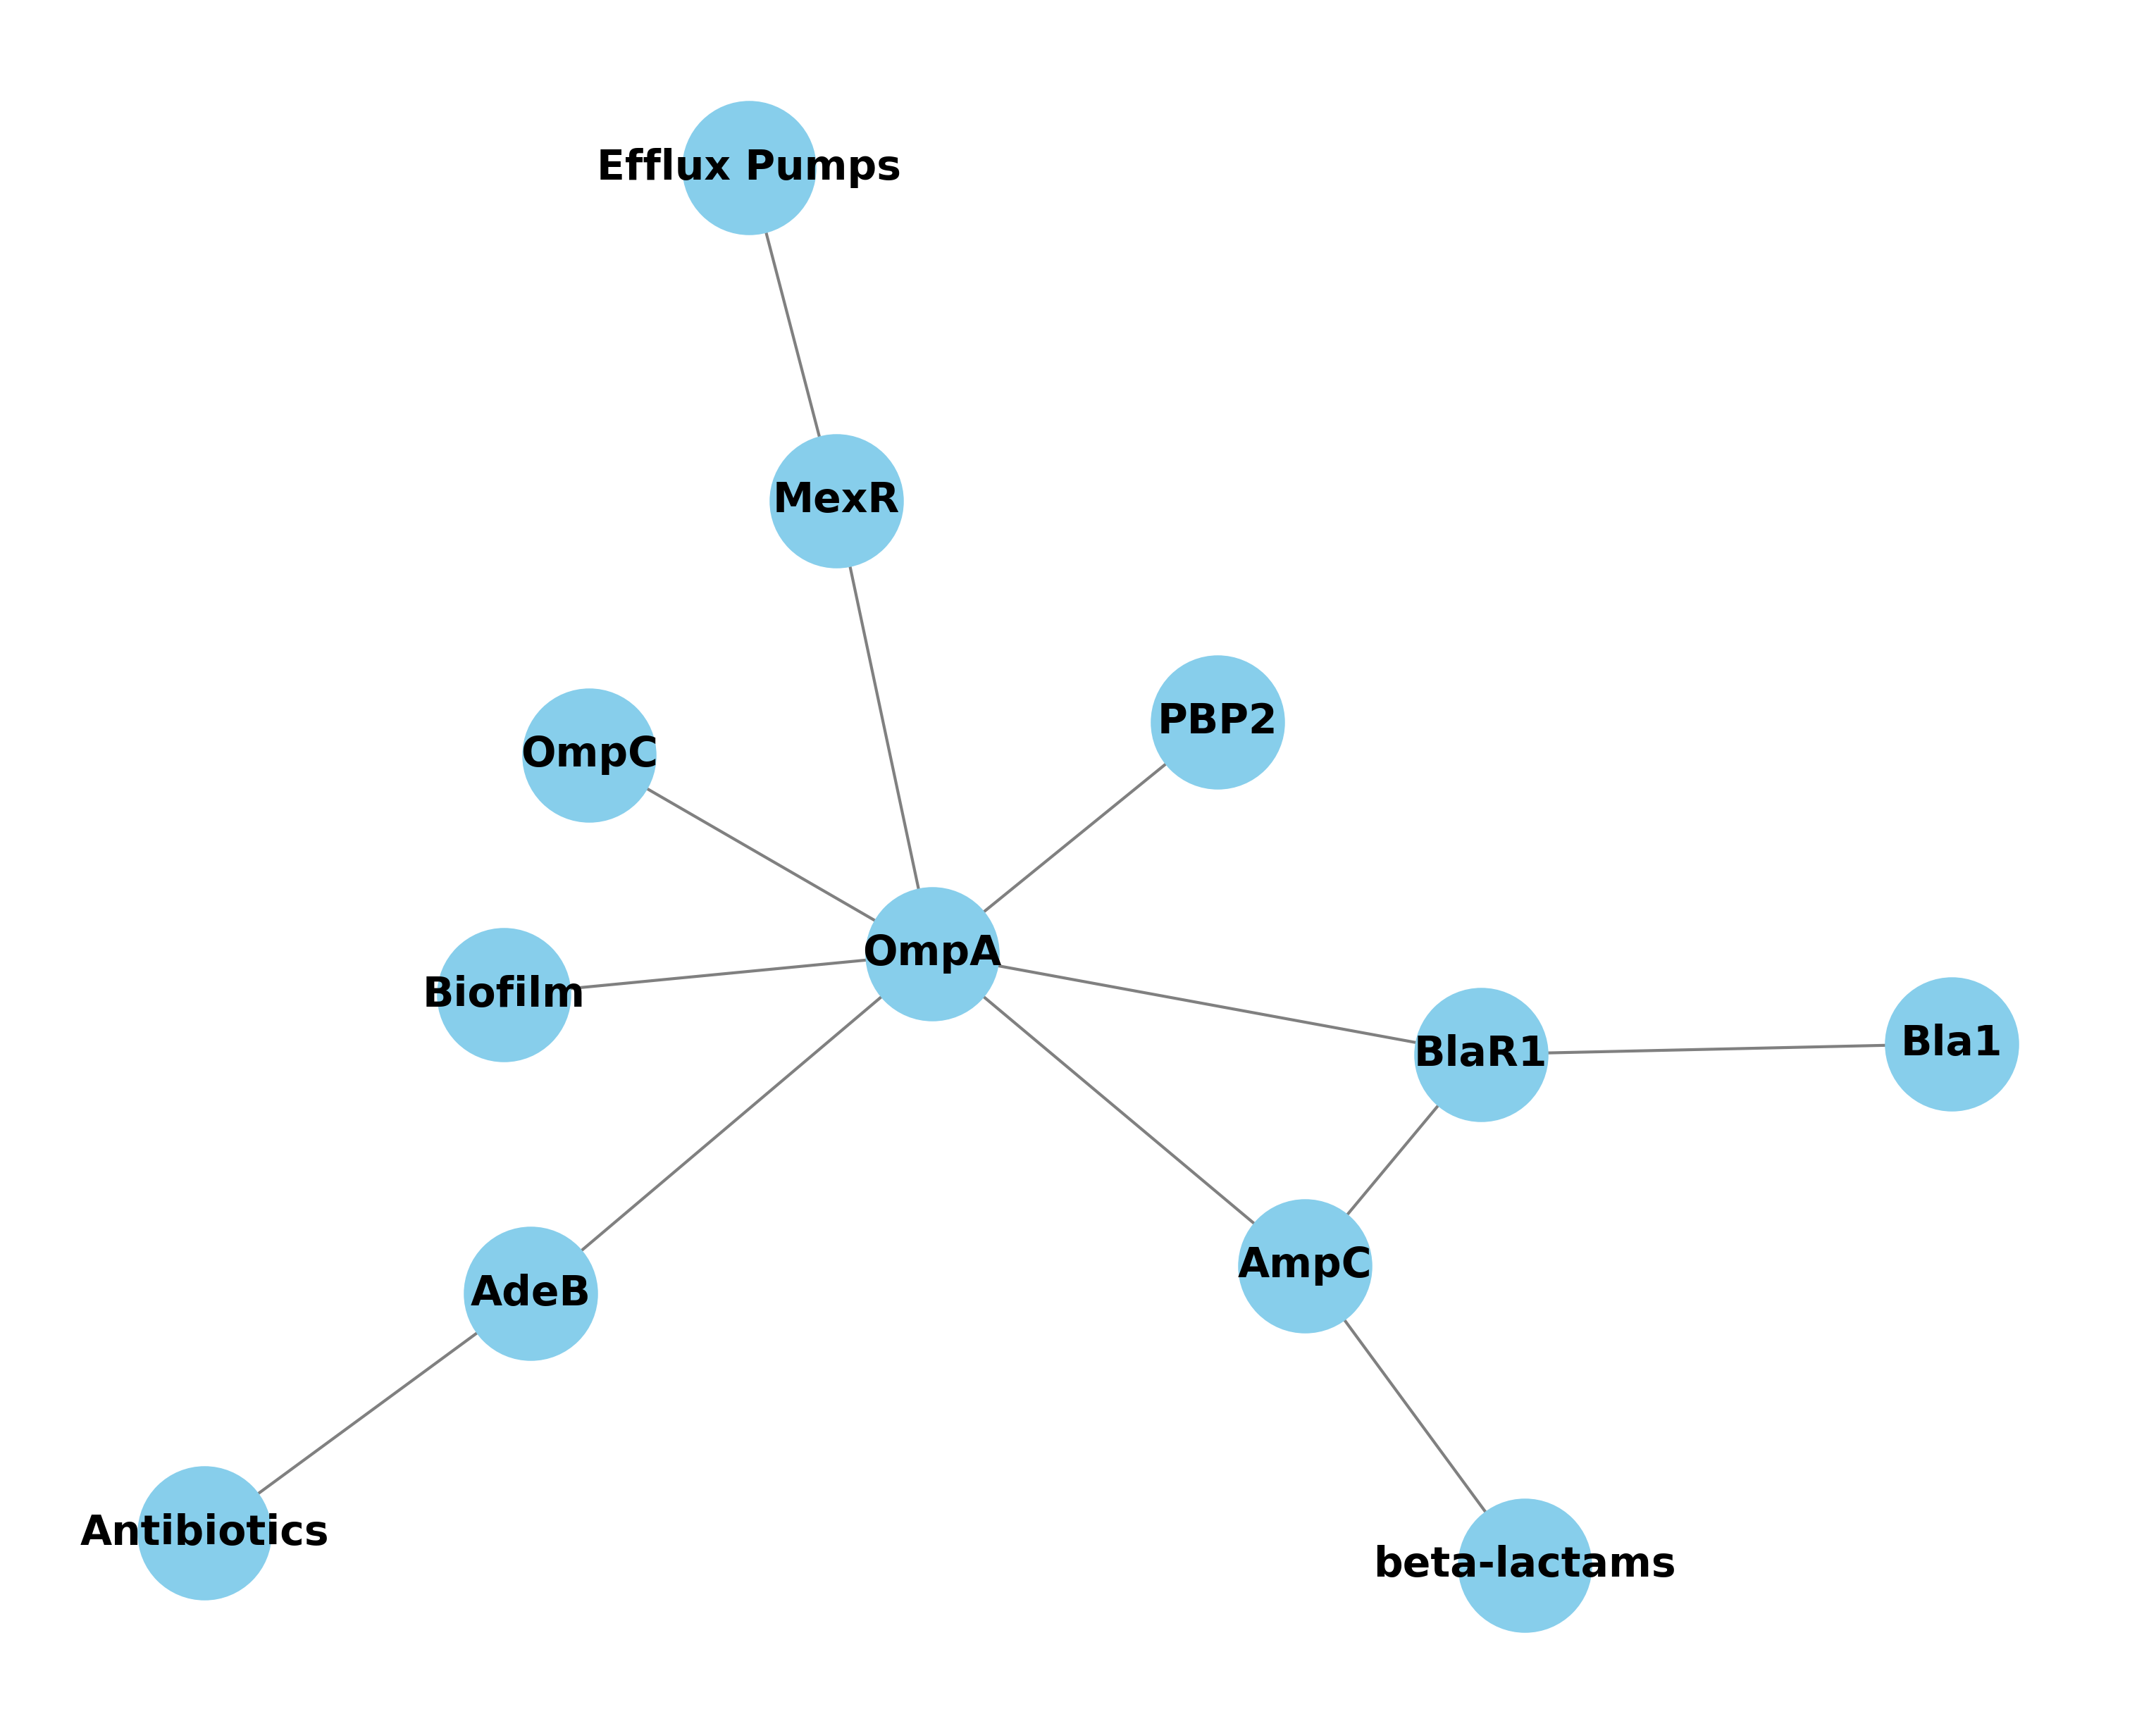

In [ ]:
plt.figure(figsize=(10, 8), dpi=300)
pos = nx.spring_layout(G, seed=42)  # Fix layout for consistency
nx.draw(G, pos, with_labels=False, node_size=2000, node_color="skyblue", edge_color="gray")

# Draw labels separately for better positioning
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color="black", font_weight="bold")

plt.show()
